<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-to-test-basic-functionalities" data-toc-modified-id="Notebook-to-test-basic-functionalities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook to test basic functionalities</a></span><ul class="toc-item"><li><span><a href="#Simple-backtests-with-and-without-transaction-costs" data-toc-modified-id="Simple-backtests-with-and-without-transaction-costs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple backtests with and without transaction costs</a></span><ul class="toc-item"><li><span><a href="#Without-transaction-costs" data-toc-modified-id="Without-transaction-costs-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Without transaction costs</a></span></li><li><span><a href="#With-transaction-costs" data-toc-modified-id="With-transaction-costs-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>With transaction costs</a></span></li></ul></li><li><span><a href="#Backtest-of-two-years,-using-2-different-combinations-of-MA-crossover" data-toc-modified-id="Backtest-of-two-years,-using-2-different-combinations-of-MA-crossover-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Backtest of two years, using 2 different combinations of MA crossover</a></span><ul class="toc-item"><li><span><a href="#Performance-of-each-year-individually" data-toc-modified-id="Performance-of-each-year-individually-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Performance of each year individually</a></span></li><li><span><a href="#Performance-of-both-time-periods-together" data-toc-modified-id="Performance-of-both-time-periods-together-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Performance of both time periods together</a></span></li><li><span><a href="#Checking-'Strat_position'-and-'Costs'-of-last-days-of-year-1,-and-first-days-of-year-2" data-toc-modified-id="Checking-'Strat_position'-and-'Costs'-of-last-days-of-year-1,-and-first-days-of-year-2-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Checking 'Strat_position' and 'Costs' of last days of year 1, and first days of year 2</a></span></li></ul></li><li><span><a href="#Walk-forward-ptimization.-Checking-best-combination-is-well-picked-according-to-the-average-SR-of-its-neighbors.-SP500-SR-keeps-the-original-value" data-toc-modified-id="Walk-forward-ptimization.-Checking-best-combination-is-well-picked-according-to-the-average-SR-of-its-neighbors.-SP500-SR-keeps-the-original-value-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Walk forward ptimization. Checking best combination is well picked according to the average SR of its neighbors. SP500 SR keeps the original value</a></span></li></ul></li></ul></div>

# Notebook to test basic functionalities

In [134]:
hide = True
if hide == True:
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = 'all'
    %matplotlib inline
    from IPython.core.display import HTML
    HTML("""<style>.output_png img {display: block;margin-left: auto;margin-right: auto;} </style>""")

In [135]:
hide = True
if hide == True:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import quantstats as qs
    import statistics as st
    from datetime import datetime, timedelta
    from matplotlib.colors import DivergingNorm
    from scipy.signal import convolve2d
    %run Functions.ipynb
    import import_ipynb
    import Functions

In [136]:
hide = True
if hide == True:
    qs.extend_pandas()
    plt.rcParams['figure.figsize'] = (20,6) # (26,12)
    plt.rcParams['text.color'] = 'w'
    plt.rcParams['legend.facecolor'] = '#2f3540'
    plt.rcParams['xtick.color'] = 'w'
    plt.rcParams['ytick.color'] = 'w'
    plt.rcParams['axes.labelcolor'] = 'w'


    SMALL_SIZE = 13
    MEDIUM_SIZE = 15
    BIG_SIZE = 17
    plt.rcParams['font.size'] = SMALL_SIZE
    plt.rcParams['axes.titlesize'] = BIG_SIZE
    plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
    plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
    plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
    plt.rcParams['legend.fontsize'] = SMALL_SIZE
    plt.rcParams['figure.titlesize'] = BIG_SIZE

    np.set_printoptions(edgeitems=40, linewidth=1000)

    pd.set_option("display.precision", 6)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.width', 1000)

In [137]:
ini_equity = 100
commision = 2/130000 + 12.5/130000
#0.000111538462 # 0.001 = 0.1% of the daily return

In [138]:
%run Functions.ipynb

In [119]:
full_df = get_sp500_data(from_local_file=True, save_to_file=False)

date_fmt = '%Y-%m-%d'
from_date = '2010-01-01'
to_date = '2020-12-31'

first_day = datetime.strptime('2018-01-01', date_fmt)
last_day = datetime.strptime('2019-12-31', date_fmt)

data = full_df.loc[from_date:to_date, ['Open', 'Close']].copy()
data['Market_daily_ret'] = data['Close'].pct_change().fillna((data['Close']-data['Open'])/data['Open'])

data = data.drop(['Open'], axis=1)

data.shape
data.head()

(2597, 2)

,Close,Market_daily_ret
Date,,
2010-01-04,1132.989990,0.014715
2010-01-05,1136.520020,0.003116
2010-01-06,1137.140015,0.000546
2010-01-07,1141.689941,0.004001
2010-01-08,1144.979980,0.002882


## Simple backtests with and without transaction costs

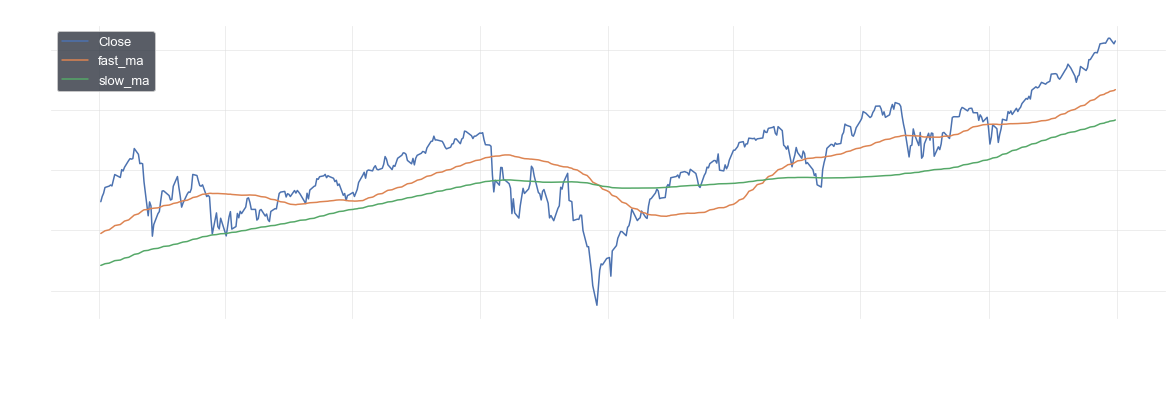

In [120]:
%run Functions.ipynb
df = data.loc[first_day:last_day].copy()

df['fast_ma'] = full_df['Close'].rolling(window=75).mean()[first_day:last_day]
df['slow_ma'] = full_df['Close'].rolling(window=200).mean()[first_day:last_day]
df[['Close', 'fast_ma', 'slow_ma']].plot(title="SP500 with MAs of 75 and 200 (2018:2019)", figsize=(20,6))

### Without transaction costs

Backtest without transaction costs: 
DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'], dtype='datetime64[ns]', name='Date', length=503, freq=None)
2018-01-02T00:00:00.000000000


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2018-01-02,2695.810059,0.008303,1,0,0,0.008303,100.830336,100.830336
2018-01-03,2713.060059,0.006399,1,0,0,0.006399,101.475531,101.475531


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2018-12-21,2416.620117,-0.020588,1,0,0,-0.020588,90.387903,90.387903
2018-12-24,2351.100098,-0.027112,1,0,0,-0.027112,87.937283,87.937283
2018-12-26,2467.699951,0.049594,-1,0,0,-0.049594,92.298422,83.576144
2018-12-27,2488.830078,0.008563,-1,0,0,-0.008563,93.088744,82.860509


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2019-04-22,2907.969971,0.001012,-1,0,0,-0.001012,108.765671,70.564213
2019-04-23,2933.679932,0.008841,-1,0,0,-0.008841,109.727291,69.940341
2019-04-24,2927.250000,-0.002192,1,0,0,-0.002192,109.486794,69.787048
2019-04-25,2926.169922,-0.000369,1,0,0,-0.000369,109.446397,69.761298


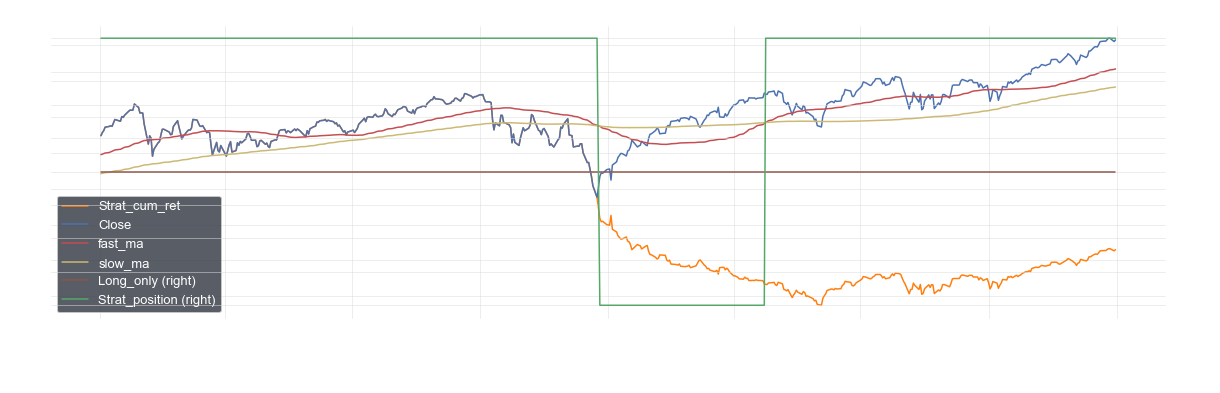

In [121]:
%run Functions.ipynb
df = data.loc[first_day:last_day].copy()
print("Backtest without transaction costs: ")
_, _, _ = backtest_ma_strat(df, fast_ma=75, slow_ma=200, last_position=0, commision=0)
show_plot(df, start=first_day, end=last_day, norm=False, benchmark=True, position=True, fast_ma=75, slow_ma=200)

df.head(2)
df.loc['2018-12-21':'2018-12-27']
df.loc['2019-04-22':'2019-04-25']

### With transaction costs

Backtest with transaction costs: 
DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'], dtype='datetime64[ns]', name='Date', length=503, freq=None)
2018-01-02T00:00:00.000000000


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2018-01-02,2695.810059,0.008303,1,0,0.000112,0.008192,100.830336,100.819182
2018-01-03,2713.060059,0.006399,1,0,0.000000,0.006399,101.475531,101.464306


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2018-12-21,2416.620117,-0.020588,1,0,0.000000,-0.020588,90.387903,90.377905
2018-12-24,2351.100098,-0.027112,1,0,0.000000,-0.027112,87.937283,87.927556
2018-12-26,2467.699951,0.049594,-1,0,0.000112,-0.049705,92.298422,83.557092
2018-12-27,2488.830078,0.008563,-1,0,0.000000,-0.008563,93.088744,82.841619


,Close,Market_daily_ret,Strat_position,Long_only,Costs,Strat_daily_ret,Market_cum_ret,Strat_cum_ret
Date,,,,,,,,
2019-04-22,2907.969971,0.001012,-1,0,0.000000,-0.001012,108.765671,70.548127
2019-04-23,2933.679932,0.008841,-1,0,0.000000,-0.008841,109.727291,69.924397
2019-04-24,2927.250000,-0.002192,1,0,0.000112,-0.002303,109.486794,69.763340
2019-04-25,2926.169922,-0.000369,1,0,0.000000,-0.000369,109.446397,69.737599


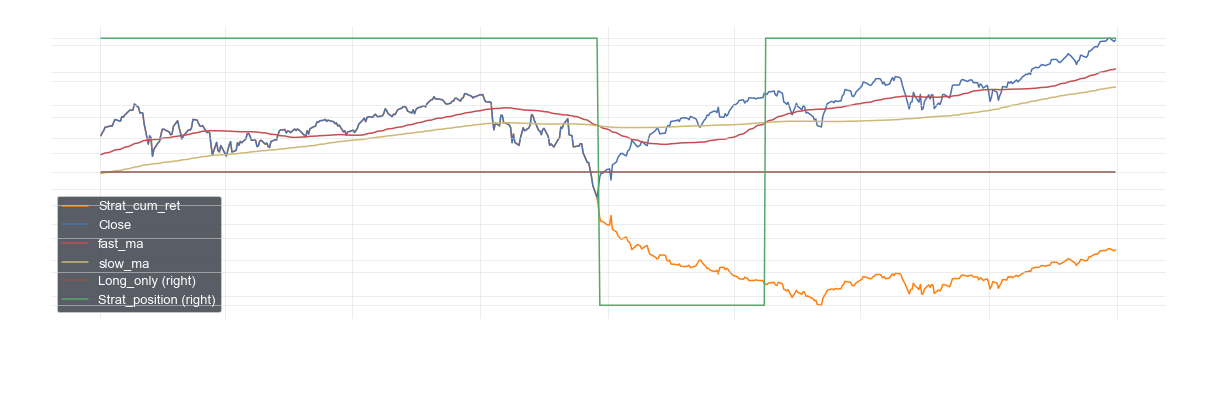

In [122]:
%run Functions.ipynb
df = data.loc[first_day:last_day].copy()
print("Backtest with transaction costs: ")
_, _, _ = backtest_ma_strat(df, fast_ma=75, slow_ma=200, last_position=0, commision=commision)
show_plot(df, start=first_day, end=last_day, norm=False, benchmark=True, position=True, fast_ma=75, slow_ma=200)

df.head(2)
df.loc['2018-12-21':'2018-12-27']
df.loc['2019-04-22':'2019-04-25']

## Backtest of two years, using 2 different combinations of MA crossover

### Performance of each year individually

	Period: 2018-01-02 to 2018-12-31
	Overall return of SP500: 93.76 %. SR of SP500: -0.29
	Overall return of long only: 93.75 %. Sharpe ratio strategy: -0.29
	Period: 2019-01-02 to 2019-12-31
	Overall return of SP500: 128.88 %. SR of SP500: 2.10
	Overall return of 75-200 MA crossover: 93.61 %. Sharpe ratio strategy: -0.46


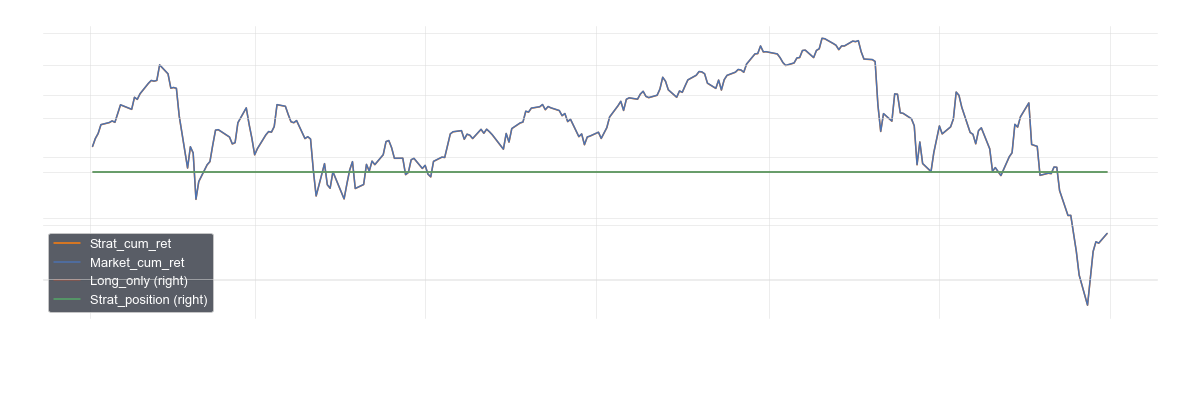

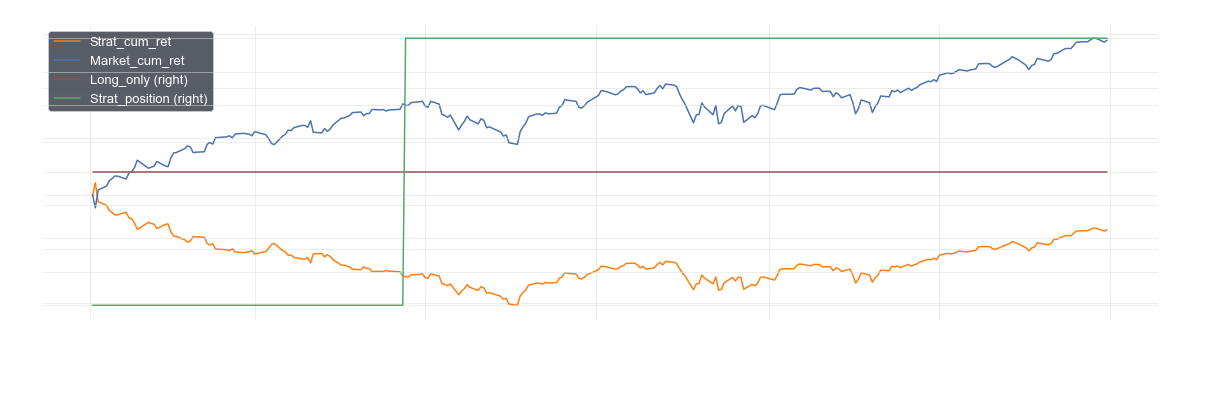

In [124]:
%run Functions.ipynb
df = data.copy()
tmp_df = pd.DataFrame()

cols = ['Strat_daily_ret', 'Strat_position', 'Costs', 'Long_only', 'Market_cum_ret', 'Strat_cum_ret']
one_day = pd.tseries.offsets.BusinessDay(n=1)
df_year_1 = df.loc[str(first_day.year)].copy()
df_year_2 = df.loc[str(last_day.year)].copy()

#  Get returns of each strategy for each year
ma_backtest_print_plot(df_year_1, last_position=0)
last_position = df_year_1.loc[df_year_1.index[-1], 'Strat_position']

ma_backtest_print_plot(df_year_2, last_position=last_position, fast_ma=75, slow_ma=200)
tmp_df = pd.concat([df_year_1, df_year_2], axis=0)

#  Add all obtained columns in the original df
df = pd.concat([df, tmp_df[cols]], axis=1)

### Performance of both time periods together

	Period: 2018-01-02 to 2019-12-31
	Overall return of SP500: nan %. SR of SP500: 0.62
	Overall return of our strategy: nan %. Sharpe ratio strategy: -0.16


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a27780ad0>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a2747fad0>, <matplotlib.axes._subplots.AxesSubplot object at 0x1a2744d890>], dtype=object)

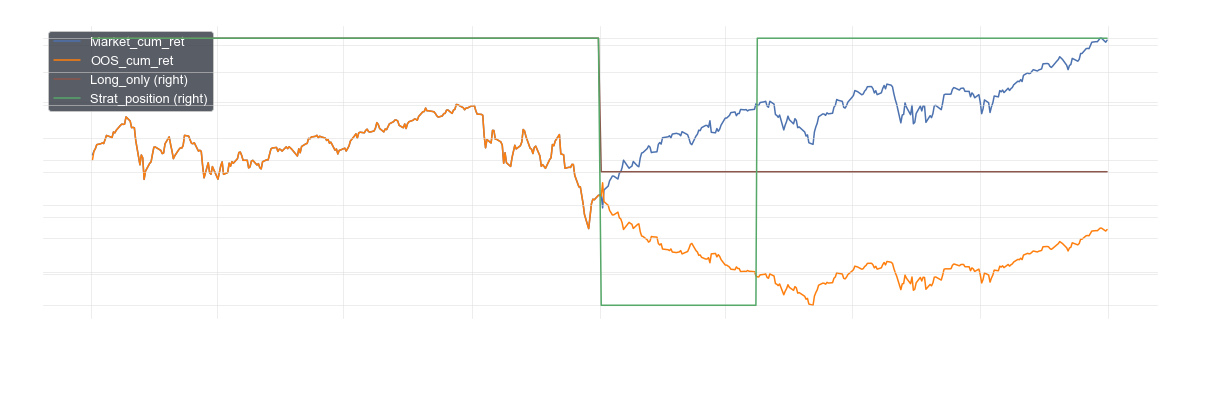

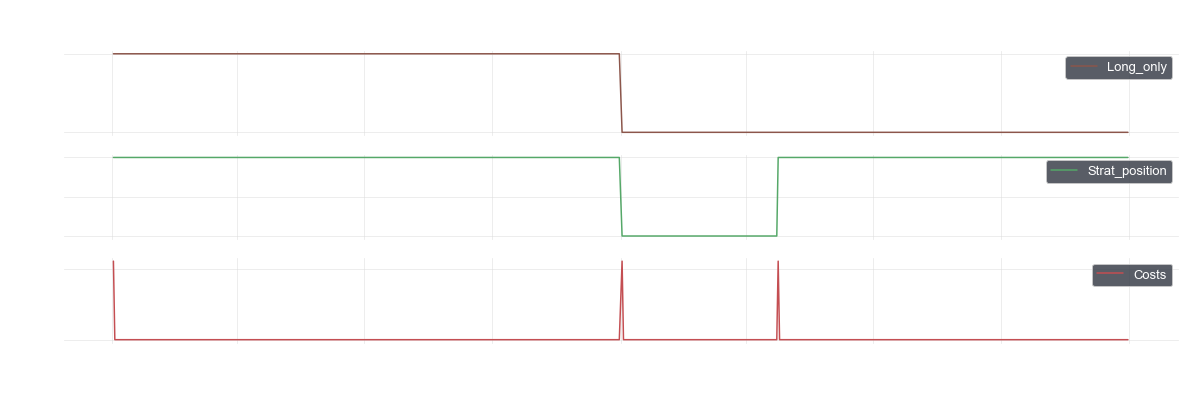

In [126]:
%run Functions.ipynb
results_df = prepare_oos_df(df, start_date=first_day, end_date=last_day)

print("\tPeriod: {:%Y-%m-%d} to {:%Y-%m-%d}".format(results_df.index[0], results_df.index[-1]))
print("\tOverall return of SP500: {:.2f} %. SR of SP500: {:.2f}".format(df['Market_cum_ret'][-1], df['Market_daily_ret'].sharpe()))
print("\tOverall return of our strategy: {:.2f} %. Sharpe ratio strategy: {:.2f}".format(df['Strat_cum_ret'][-1], df['Strat_daily_ret'].sharpe()))

show_oos_plot(results_df)
cols = ['Long_only', 'Strat_position', 'Costs']
results_df[cols].plot(subplots=True, title='Strategy Postition and costs', color=('tab:brown', 'g', 'r'))

### Checking 'Strat_position' and 'Costs' of last days of year 1, and first days of year 2

In [127]:
last_day_2018 = results_df[str(first_day.year)].index[-1]
first_day_2019 = results_df[str(last_day.year)].index[0]
results_df.head(2)
results_df.loc[last_day_2018-one_day:first_day_2019+one_day]
results_df.loc['2019-04-22':'2019-04-25']

,Close,Market_daily_ret,OOS_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,OOS_cum_ret
Date,,,,,,,,
2018-01-02,2695.810059,0.008303,0.008303,1.0,1.0,0.000112,100.830336,99.999888
2018-01-03,2713.060059,0.006399,0.006399,1.0,1.0,0.000000,101.475531,101.475531


,Close,Market_daily_ret,OOS_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,OOS_cum_ret
Date,,,,,,,,
2018-12-28,2485.739990,-0.001242,-0.001242,1.0,1.0,0.000000,92.973167,92.973167
2018-12-31,2506.850098,0.008492,0.008492,1.0,1.0,0.000000,93.762740,93.762740
2019-01-02,2510.030029,0.001268,-0.001380,-1.0,0.0,0.000112,93.881678,93.633344
2019-01-03,2447.889893,-0.024757,0.024757,-1.0,0.0,0.000000,91.557475,95.951400


,Close,Market_daily_ret,OOS_daily_ret,Strat_position,Long_only,Costs,Market_cum_ret,OOS_cum_ret
Date,,,,,,,,
2019-04-22,2907.969971,0.001012,-0.001012,-1.0,0.0,0.000000,108.765671,80.423655
2019-04-23,2933.679932,0.008841,-0.008841,-1.0,0.0,0.000000,109.727291,79.712613
2019-04-24,2927.250000,-0.002192,-0.002303,1.0,0.0,0.000112,109.486794,79.529011
2019-04-25,2926.169922,-0.000369,-0.000369,1.0,0.0,0.000000,109.446397,79.499667


## Walk forward ptimization. Checking best combination is well picked according to the average SR of its neighbors. SP500 SR keeps the original value

In [150]:
%run Functions.ipynb

fast_ma_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
slow_ma_list = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240]

IS_start_years = pd.date_range(start='2015-01-01', end='2015-01-01', freq='1YS', closed=None)
IS_end_years = pd.date_range(start='2017-12-31', end='2017-12-31', freq='1Y', closed=None)
OOS_start_years = pd.date_range(start='2018-01-01', end='2018-01-01', freq='1YS', closed=None)
OOS_end_years = pd.date_range(start='2018-12-31', end='2018-12-31', freq='1Y', closed=None)

#len(IS_start_years)
print_periods(IS_start_years, IS_end_years, OOS_start_years, OOS_end_years)
df = data[IS_start_years[0]:OOS_end_years[-1]].copy()
df.head(2)

	In SAMPLE		OOS
2015-01-01 2017-12-31 	 2018-01-01 2018-12-31


,Close,Market_daily_ret
Date,,
2015-01-02,2058.199951,-0.000340
2015-01-05,2020.579956,-0.018278


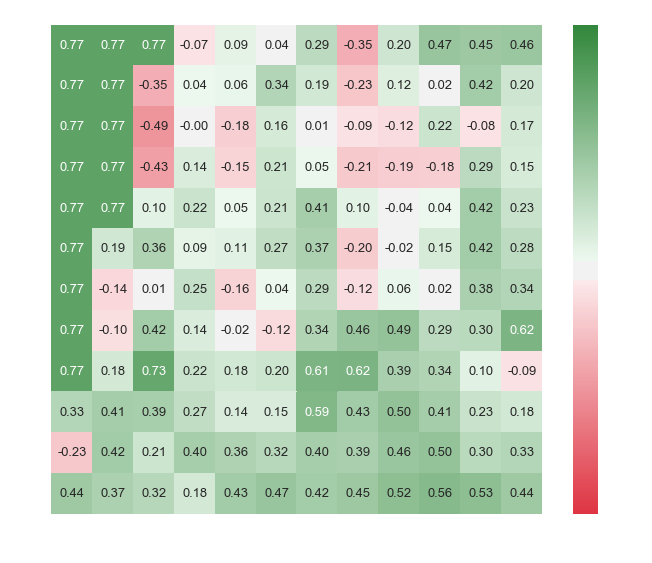

results_sharpe_neighbors
[[ 0.19  0.23  0.32  0.34  0.35  0.39  0.41  0.44  0.47  0.46  0.43  0.39]
 [ 0.39  0.28  0.35  0.29  0.29  0.37  0.4   0.47  0.47  0.44  0.4   0.34]
 [ 0.39  0.4   0.35  0.33  0.26  0.35  0.39  0.5   0.44  0.35  0.26  0.18]
 [  nan  0.62  0.24  0.28  0.12  0.24  0.34  0.48  0.44  0.34  0.29  0.29]
 [  nan  0.7   0.16  0.2   0.09  0.19  0.25  0.34  0.26  0.26  0.25  0.21]
 [  nan  0.64  0.15  0.12  0.09  0.14  0.13  0.23  0.14  0.26  0.3   0.4 ]
 [  nan  0.85  0.21  0.12  0.12  0.16  0.13  0.13  0.    0.16  0.23  0.36]
 [  nan   nan  0.35  0.03  0.14  0.16  0.1   0.02 -0.06  0.11  0.17  0.31]
 [  nan   nan  0.46 -0.11  0.1   0.07  0.1   0.02 -0.04  0.07  0.12  0.21]
 [  nan   nan  0.34 -0.17  0.1   0.06  0.05 -0.05 -0.07  0.03  0.16  0.2 ]
 [  nan   nan  0.64 -0.03  0.05  0.08  0.02  0.03  0.01  0.21  0.24  0.28]
 [  nan   nan   nan  0.15  0.08  0.19 -0.    0.11  0.01  0.24  0.31  0.36]]


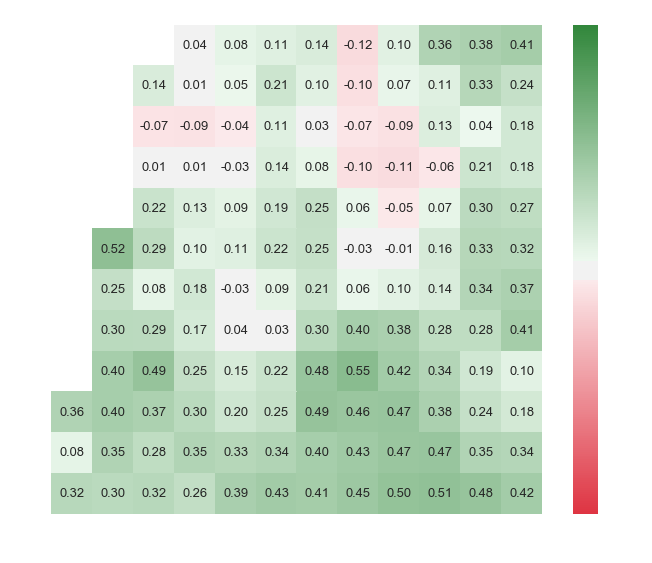

Best In-sample performance:
	Period: 2015-01-02 to 2017-12-29
	Overall return of SP500: 129.86 %. SR of SP500: 0.77
	Overall return of long only: 129.84 %. Sharpe ratio strategy: 0.77
End of optimization


In [249]:
%run Functions.ipynb

df = data[IS_start_years[0]:OOS_end_years[-1]].copy()

best_combinations = []

for IS_start, IS_end, OOS_start, OOS_end in zip(IS_start_years, IS_end_years, OOS_start_years, OOS_end_years):
    results_pnl = np.zeros((len(fast_ma_list),len(slow_ma_list)))
    results_sharpe = np.zeros((len(fast_ma_list),len(slow_ma_list)))

    in_sample = df.loc[IS_start:IS_end].copy()
    oos_sample = df.loc[OOS_start:OOS_end].copy()
    
    ############################################ IN SAMPLE  ############################################
    results_pnl, results_sharpe = run_all_combinations(in_sample, fast_ma_list, slow_ma_list, allow_long_only=True)
    title = "Individual SR In Sample ("+str(IS_start.date())+":"+ str(IS_end.date()) +")"
    show_heatmap(results_sharpe, plot_title=title, x_title="Slow MA", x_values=slow_ma_list, y_title="Fast MA", y_values=fast_ma_list)
    
    # Get index of maximum SR for the In-Sample period
    fast_index, slow_index, robust_results_sharpe = get_best_combination(results_sharpe, fast_ma_list, slow_ma_list)
    
    title = "Robust SR In Sample ("+str(IS_start.date())+":"+ str(IS_end.date()) +")"
   # show_heatmap(robust_results_sharpe, plot_title=title, x_title="Slow MA", x_values=slow_ma_list, y_title="Fast MA", y_values=fast_ma_list)

    print("Best In-sample performance:")
    print_backtest_stats(in_sample, fast_ma_list[fast_index], slow_ma_list[slow_index], results_pnl[fast_index, slow_index], results_sharpe[fast_index, slow_index])
    
    ############################################ OUT OF SAMPLE  ############################################
#     print("OOS performance:")
#     _, pnl_sp, sharpe_sp = backtest_ma_strat(oos_sample, fast_ma=1, slow_ma=1)    
#     _, pnl, sharpe = backtest_ma_strat(oos_sample, fast_ma_list[fast_index], slow_ma_list[slow_index])
#     print_backtest_stats(oos_sample, fast_ma_list[fast_index], slow_ma_list[slow_index], pnl, sharpe)  
#     best_combinations.append([fast_ma_list[fast_index], slow_ma_list[slow_index]])
    
#     # Save OOS position and daily returns
#     df.loc[OOS_start:OOS_end, 'Strat_position'] = oos_sample['Strat_position']
#     df.loc[OOS_start:OOS_end, 'OOS_daily_ret'] = oos_sample['Strat_daily_ret']
#     print()
    
# results_df = prepare_oos_df(df.copy(), start_date=OOS_start_years[0], end_date=OOS_end_years[-1])
# results_df.iloc[[0,-1]]

print("End of optimization")

In [154]:
pd.__version__

'1.0.1'

In [202]:
range(1, 3)

range(1, 3)

In [237]:
type(goal)
goal

numpy.ndarray

array([[ 3.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  3.],
       [ 5.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [ 5.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [nan,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [nan,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [nan,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [nan,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [nan, nan,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [nan, nan,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [nan, nan,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [nan, nan,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [nan, nan, nan,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  3.]])

In [240]:
goal = np.array([[ 3.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  3.],
       [ 5.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [ 4.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [np.nan,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [np.nan,  5.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [np.nan,  5.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [np.nan,  5.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [np.nan, np.nan,  6.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [np.nan, np.nan,  5.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [np.nan, np.nan,  5.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [np.nan, np.nan,  3.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  5.],
       [np.nan, np.nan, np.nan,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  3.]])